## Load packages and parameter configuration

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

start_date = '2015-11-25' # Data start date (inclusive)
end_date = '2018-11-24' # Data end date (exclusive)
path = f'./data/VTI_{start_date}_{end_date}' # Path of downloaded data file

## Load data

In [23]:
data = pd.read_csv(f'{path}/VTI.csv')
data['Date'] = pd.to_datetime(data['Date']) # Convert to datetime
data['Month'] = data['Date'].dt.month
data['DayOfMonth'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

data.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Month,DayOfMonth,DayOfWeek
0,2015-11-25,107.510002,107.660004,107.250000,107.470001,94.460785,1820300,11,25,2
1,2015-11-27,107.589996,107.760002,107.220001,107.629997,94.601395,552400,11,27,4
2,2015-11-30,107.779999,107.849998,107.110001,107.169998,94.197067,3618100,11,30,0
3,2015-12-01,107.589996,108.209999,107.370003,108.180000,95.084846,2443600,12,1,1
4,2015-12-02,108.099998,108.269997,106.879997,107.050003,94.091621,2937200,12,2,2


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        755 non-null    datetime64[ns]
 1   Open        755 non-null    float64       
 2   High        755 non-null    float64       
 3   Low         755 non-null    float64       
 4   Close       755 non-null    float64       
 5   AdjClose    755 non-null    float64       
 6   Volume      755 non-null    int64         
 7   Month       755 non-null    int64         
 8   DayOfMonth  755 non-null    int64         
 9   DayOfWeek   755 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 59.1 KB


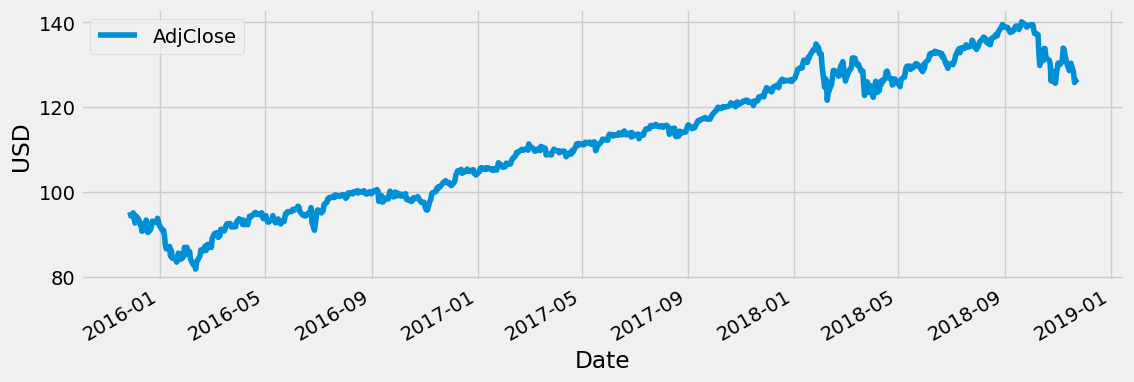

In [25]:
fig, ax = plt.subplots(figsize=(12,4))

data.plot(x='Date', y='AdjClose', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('USD')

plt.show()

### Average AdjClose by Month
On average, later months have a higher value than earlier months. However, the average drops in November and December.

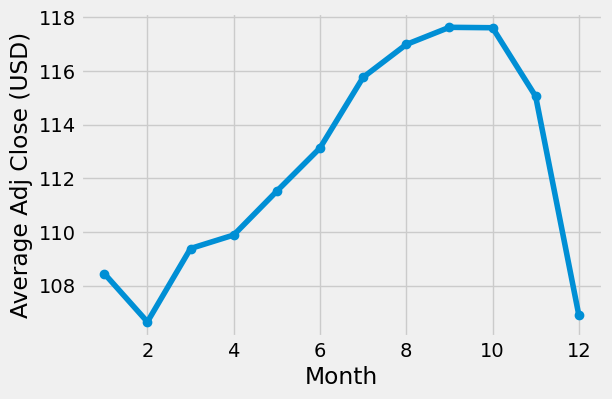

In [26]:
temp = pd.DataFrame(data.groupby(['Month'])['AdjClose'].mean()).reset_index()

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(temp['Month'], temp['AdjClose'], '-o')
ax.set_xlabel('Month')
ax.set_ylabel('Average Adj Close (USD)')

plt.show()

### Average AdjClose by DayOfWeek
On average, Friday has higher price than other days of week.

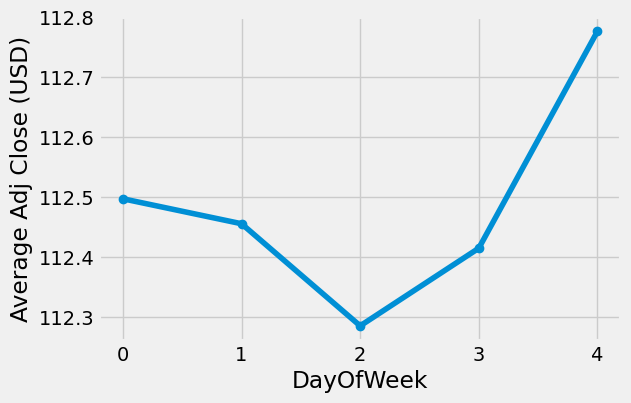

In [27]:
temp = pd.DataFrame(data.groupby(['DayOfWeek'])['AdjClose'].mean()).reset_index()

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(temp['DayOfWeek'], temp['AdjClose'], '-o')
ax.set_xlabel('DayOfWeek')
ax.set_ylabel('Average Adj Close (USD)')

plt.show()

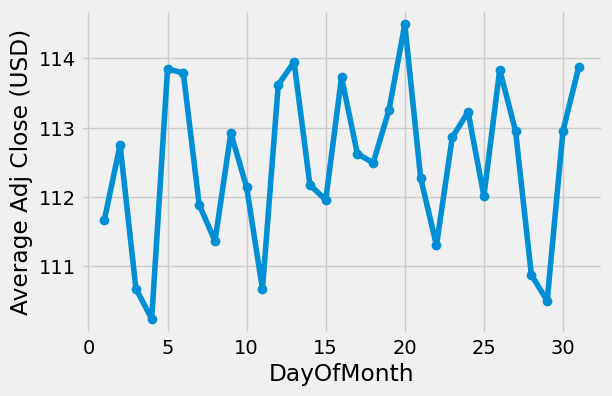

In [28]:
temp = pd.DataFrame(data.groupby(['DayOfMonth'])['AdjClose'].mean()).reset_index()

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(temp['DayOfMonth'], temp['AdjClose'], '-o')
ax.set_xlabel('DayOfMonth')
ax.set_ylabel('Average Adj Close (USD)')

plt.show()

## Feature engineering

- Difference of high and low
- Difference of open and close
- Lag N days: AdjClose, Volume, Diff_HighLow, Diff_OpenClose

In [29]:
# Create new columns
data['Diff_HighLow'] = data['High']-data['Low']
data['Diff_OpenClose'] = data['Open']-data['Close']

# Drop the ones not needed
data.drop(['High','Low'], axis=1, inplace=True)
data.drop(['Open','Close'], axis=1, inplace=True)

data.head()

,Date,AdjClose,Volume,Month,DayOfMonth,DayOfWeek,Diff_HighLow,Diff_OpenClose
0,2015-11-25,94.460785,1820300,11,25,2,0.410004,0.040001
1,2015-11-27,94.601395,552400,11,27,4,0.540001,-0.040001
2,2015-11-30,94.197067,3618100,11,30,0,0.739998,0.610001
3,2015-12-01,95.084846,2443600,12,1,1,0.839996,-0.590004
4,2015-12-02,94.091621,2937200,12,2,2,1.389999,1.049995


In [30]:
N = 7 # for feature at day t, we use lags from t-1, t-2, ..., t-N as features

In [31]:
data_lags = data.copy()

for i in range(1, N+1):
    data_lags[f"AdjClose_Lag{str(i)}"] = data_lags['AdjClose'].shift(i) # lag i day
    data_lags[f"Diff_HighLow_Lag{str(i)}"] = data_lags['Diff_HighLow'].shift(i) # lag i day
    data_lags[f"Diff_OpenClose_Lag{str(i)}"] = data_lags['Diff_OpenClose'].shift(i) # lag i day
    data_lags[f"Volume_Lag{str(i)}"] = data_lags['Volume'].shift(i) # lag i day

In [32]:
data_lags.head(10)

,Date,AdjClose,Volume,Month,DayOfMonth,DayOfWeek,Diff_HighLow,Diff_OpenClose,AdjClose_Lag1,Diff_HighLow_Lag1,...,Diff_OpenClose_Lag5,Volume_Lag5,AdjClose_Lag6,Diff_HighLow_Lag6,Diff_OpenClose_Lag6,Volume_Lag6,AdjClose_Lag7,Diff_HighLow_Lag7,Diff_OpenClose_Lag7,Volume_Lag7
0,2015-11-25,94.460785,1820300,11,25,2,0.410004,0.040001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-27,94.601395,552400,11,27,4,0.540001,-0.040001,94.460785,0.410004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-30,94.197067,3618100,11,30,0,0.739998,0.610001,94.601395,0.540001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-12-01,95.084846,2443600,12,1,1,0.839996,-0.590004,94.197067,0.739998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-12-02,94.091621,2937200,12,2,2,1.389999,1.049995,95.084846,0.839996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-12-03,92.685295,3345600,12,3,3,2.420006,1.840004,94.091621,1.389999,...,0.040001,1820300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-12-04,94.390442,4520000,12,4,4,1.919998,-1.580002,92.685295,2.420006,...,-0.040001,552400.0,94.460785,0.410004,0.040001,1820300.0,NaN,NaN,NaN,NaN
7,2015-12-07,93.652115,3000500,12,7,0,1.209999,0.680000,94.390442,1.919998,...,0.610001,3618100.0,94.601395,0.540001,-0.040001,552400.0,94.460785,0.410004,0.040001,1820300.0
8,2015-12-08,93.089622,3149600,12,8,1,1.130005,0.029999,93.652115,1.209999,...,-0.590004,2443600.0,94.197067,0.739998,0.610001,3618100.0,94.601395,0.540001,-0.040001,552400.0
9,2015-12-09,92.289764,4179800,12,9,2,2.269997,0.550003,93.089622,1.130005,...,1.049995,2937200.0,95.084846,0.839996,-0.590004,2443600.0,94.197067,0.739998,0.610001,3618100.0


In [33]:
data_lags = data_lags.iloc[7:,:] # Remove the first 6 days without lag

In [34]:
data_lags.head()

,Date,AdjClose,Volume,Month,DayOfMonth,DayOfWeek,Diff_HighLow,Diff_OpenClose,AdjClose_Lag1,Diff_HighLow_Lag1,...,Diff_OpenClose_Lag5,Volume_Lag5,AdjClose_Lag6,Diff_HighLow_Lag6,Diff_OpenClose_Lag6,Volume_Lag6,AdjClose_Lag7,Diff_HighLow_Lag7,Diff_OpenClose_Lag7,Volume_Lag7
7,2015-12-07,93.652115,3000500,12,7,0,1.209999,0.680000,94.390442,1.919998,...,0.610001,3618100.0,94.601395,0.540001,-0.040001,552400.0,94.460785,0.410004,0.040001,1820300.0
8,2015-12-08,93.089622,3149600,12,8,1,1.130005,0.029999,93.652115,1.209999,...,-0.590004,2443600.0,94.197067,0.739998,0.610001,3618100.0,94.601395,0.540001,-0.040001,552400.0
9,2015-12-09,92.289764,4179800,12,9,2,2.269997,0.550003,93.089622,1.130005,...,1.049995,2937200.0,95.084846,0.839996,-0.590004,2443600.0,94.197067,0.739998,0.610001,3618100.0
10,2015-12-10,92.562263,3684900,12,10,3,1.139999,-0.129997,92.289764,2.269997,...,1.840004,3345600.0,94.091621,1.389999,1.049995,2937200.0,95.084846,0.839996,-0.590004,2443600.0
11,2015-12-11,90.742813,5100700,12,11,4,1.360001,0.930000,92.562263,1.139999,...,-1.580002,4520000.0,92.685295,2.420006,1.840004,3345600.0,94.091621,1.389999,1.049995,2937200.0


## Train, validation, test split

In [35]:
test_size = 0.2 # proportion of dataset to be used as test set
cv_size = 0.2 # proportion of dataset to be used as cross-validation set

In [36]:
nrows = data_lags.shape[0]
nrows_cv = int(cv_size*nrows)
nrows_test = int(test_size*nrows)
nrows_train = nrows-nrows_cv-nrows_test

In [37]:
# Split into train, cv, test dataframes
df_train = data_lags[:nrows_train]
df_cv = data_lags[nrows_train:nrows_train+nrows_cv]
df_test = data_lags[nrows_train+nrows_cv:]

In [38]:
features = ['AdjClose_Lag1', 'Diff_HighLow_Lag1', 'Diff_OpenClose_Lag1', 'Volume_Lag1', 
            'AdjClose_Lag2', 'Diff_HighLow_Lag2', 'Diff_OpenClose_Lag2', 'Volume_Lag2',
            'AdjClose_Lag3', 'Diff_HighLow_Lag3', 'Diff_OpenClose_Lag3', 'Volume_Lag3', 
            'AdjClose_Lag4', 'Diff_HighLow_Lag4', 'Diff_OpenClose_Lag4', 'Volume_Lag4', 
            'AdjClose_Lag5', 'Diff_HighLow_Lag5', 'Diff_OpenClose_Lag5', 'Volume_Lag5',
            'AdjClose_Lag6', 'Diff_HighLow_Lag6', 'Diff_OpenClose_Lag6', 'Volume_Lag6', 
            'AdjClose_Lag7', 'Diff_HighLow_Lag7', 'Diff_OpenClose_Lag7', 'Volume_Lag7']
target = 'AdjClose'

In [44]:
# Split into X and y
X_train = df_train[features]
y_train = df_train[target]

X_cv = df_cv[features]
y_cv = df_cv[target]

X_test = df_test[features]
y_test = df_test[target]

In [45]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_cv shape: {X_cv.shape}")
print(f"y_cv shape: {y_cv.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (450, 28)
y_train shape: (450,)
X_cv shape: (149, 28)
y_cv shape: (149,)
X_test shape: (149, 28)
y_test shape: (149,)


In [49]:
X_train.head()

,AdjClose_Lag1,Diff_HighLow_Lag1,Diff_OpenClose_Lag1,Volume_Lag1,AdjClose_Lag2,Diff_HighLow_Lag2,Diff_OpenClose_Lag2,Volume_Lag2,AdjClose_Lag3,Diff_HighLow_Lag3,...,Diff_OpenClose_Lag5,Volume_Lag5,AdjClose_Lag6,Diff_HighLow_Lag6,Diff_OpenClose_Lag6,Volume_Lag6,AdjClose_Lag7,Diff_HighLow_Lag7,Diff_OpenClose_Lag7,Volume_Lag7
7,94.390442,1.919998,-1.580002,4520000.0,92.685295,2.420006,1.840004,3345600.0,94.091621,1.389999,...,0.610001,3618100.0,94.601395,0.540001,-0.040001,552400.0,94.460785,0.410004,0.040001,1820300.0
8,93.652115,1.209999,0.680000,3000500.0,94.390442,1.919998,-1.580002,4520000.0,92.685295,2.420006,...,-0.590004,2443600.0,94.197067,0.739998,0.610001,3618100.0,94.601395,0.540001,-0.040001,552400.0
9,93.089622,1.130005,0.029999,3149600.0,93.652115,1.209999,0.680000,3000500.0,94.390442,1.919998,...,1.049995,2937200.0,95.084846,0.839996,-0.590004,2443600.0,94.197067,0.739998,0.610001,3618100.0
10,92.289764,2.269997,0.550003,4179800.0,93.089622,1.130005,0.029999,3149600.0,93.652115,1.209999,...,1.840004,3345600.0,94.091621,1.389999,1.049995,2937200.0,95.084846,0.839996,-0.590004,2443600.0
11,92.562263,1.139999,-0.129997,3684900.0,92.289764,2.269997,0.550003,4179800.0,93.089622,1.130005,...,-1.580002,4520000.0,92.685295,2.420006,1.840004,3345600.0,94.091621,1.389999,1.049995,2937200.0


- The first 450 days data will be used to train model.
- The middle 149 days data will be used to tune model.
- The last 149 days data will be used as test set.

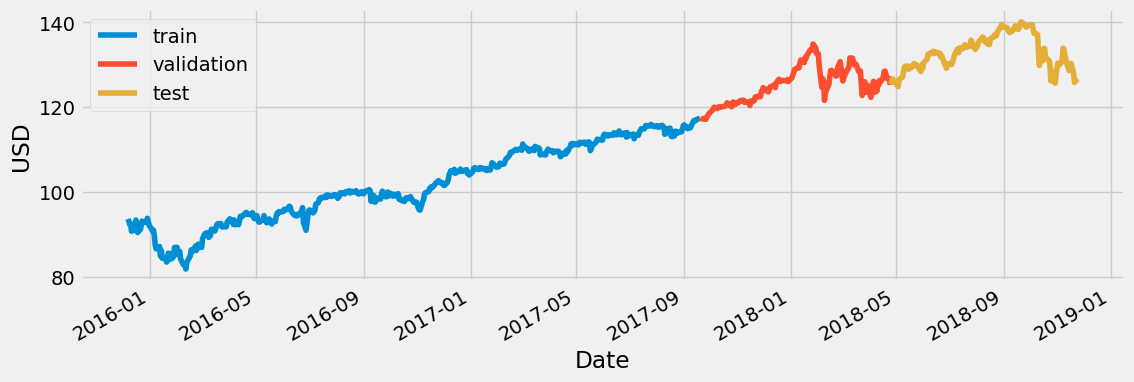

In [46]:
fig, ax = plt.subplots(figsize=(12,4))

df_train.plot(x='Date', y='AdjClose', ax=ax)
df_cv.plot(x='Date', y='AdjClose', ax=ax)
df_test.plot(x='Date', y='AdjClose', ax=ax)

ax.legend(['train','validation','test'])
ax.set_xlabel('Date')
ax.set_ylabel('USD')

plt.show()

## Write to csv

In [47]:
X_train.to_csv(f"{path}/X_train.csv", index=False)
y_train.to_csv(f"{path}/y_train.csv", index=False)

X_cv.to_csv(f"{path}/X_cv.csv", index=False)
y_cv.to_csv(f"{path}/y_cv.csv", index=False)

X_test.to_csv(f"{path}/X_test.csv", index=False)
y_test.to_csv(f"{path}/y_test.csv", index=False)

In [48]:
df_train.to_csv(f"{path}/df_train.csv", index=False)
df_cv.to_csv(f"{path}/df_cv.csv", index=False)
df_test.to_csv(f"{path}/df_test.csv", index=False)